# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

Who: For this project, our audience is mainly cybersecurity professionals and IT security managers—people who need to quickly spot potential phishing websites and take action. They already understand the basics of cyber threats but are looking for data-driven insights that can help them refine their detection methods. We want to make sure my analysis is clear and actionable for them, without getting too bogged down in technical jargon.

What:
The core idea I’m exploring is that certain characteristics of a webpage—like the structure of its URL or other features—can reveal whether it’s likely to be a phishing site. My analysis will focus on:

Pinpointing which webpage features most clearly distinguish phishing sites from legitimate ones.
Comparing how these features behave for phishing versus non-phishing sites.
Potentially even building a simple model or feature ranking that shows which attributes are the strongest indicators of phishing.


How:
Use a combination of visualizations and simple predictive modeling to tell this story.
Visualizations: Create simple graphs (like histograms, scatter plots, and correlation heatmaps) with Matplotlib and Seaborn to compare phishing vs. legitimate sites.
Build a basic model to highlight which features are most important in detecting phishing.

Narrative Flow:
Begin with an overview of the growing threat of phishing and why early detection is crucial.
Use visualizations to compare key features of phishing and legitimate sites.
Highlight the most significant indicators of phishing.
Conclude with practical recommendations to improve phishing detection.

# 3. Homework - work with your own data

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

1. Summarize the Dataset


In [4]:
df = pd.read_csv("dataset_phishing.csv")
df.info()
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

2. Check for Duplicates

In [5]:
duplicate_rows = df[df.duplicated()]
print("Duplicate rows found:", duplicate_rows)

Duplicate rows found: Empty DataFrame
Columns: [url, length_url, length_hostname, ip, nb_dots, nb_hyphens, nb_at, nb_qm, nb_and, nb_or, nb_eq, nb_underscore, nb_tilde, nb_percent, nb_slash, nb_star, nb_colon, nb_comma, nb_semicolumn, nb_dollar, nb_space, nb_www, nb_com, nb_dslash, http_in_path, https_token, ratio_digits_url, ratio_digits_host, punycode, port, tld_in_path, tld_in_subdomain, abnormal_subdomain, nb_subdomains, prefix_suffix, random_domain, shortening_service, path_extension, nb_redirection, nb_external_redirection, length_words_raw, char_repeat, shortest_words_raw, shortest_word_host, shortest_word_path, longest_words_raw, longest_word_host, longest_word_path, avg_words_raw, avg_word_host, avg_word_path, phish_hints, domain_in_brand, brand_in_subdomain, brand_in_path, suspecious_tld, statistical_report, nb_hyperlinks, ratio_intHyperlinks, ratio_extHyperlinks, ratio_nullHyperlinks, nb_extCSS, ratio_intRedirection, ratio_extRedirection, ratio_intErrors, ratio_extErrors, log

No duplicate rows were found,the dataset appears to have unique records.

3. Are there any duplicate values in a given column (when this would be inappropriate?)

In [8]:
duplicate_ids = df['url'].duplicated()
print("Duplicate URLs:", df.loc[duplicate_ids, 'url'])

Duplicate URLs: 11305    http://e710z0ear.du.r.appspot.com/c:/users/use...
Name: url, dtype: object


URL at index 11305 is flagged as a duplicate. Any duplicate values in features that are naturally repeated (like counts or binary indicators) are acceptable.

4. What Are the Mean, Median, and Mode of Each Column?

In [9]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode()[0]  # Taking the first mode if there are multiple
    print(f"{col}: mean = {mean_val:.2f}, median = {median_val:.2f}, mode = {mode_val}")

length_url: mean = 61.13, median = 47.00, mode = 26
length_hostname: mean = 21.09, median = 19.00, mode = 16
ip: mean = 0.15, median = 0.00, mode = 0
nb_dots: mean = 2.48, median = 2.00, mode = 2
nb_hyphens: mean = 1.00, median = 0.00, mode = 0
nb_at: mean = 0.02, median = 0.00, mode = 0
nb_qm: mean = 0.14, median = 0.00, mode = 0
nb_and: mean = 0.16, median = 0.00, mode = 0
nb_or: mean = 0.00, median = 0.00, mode = 0
nb_eq: mean = 0.29, median = 0.00, mode = 0
nb_underscore: mean = 0.32, median = 0.00, mode = 0
nb_tilde: mean = 0.01, median = 0.00, mode = 0
nb_percent: mean = 0.12, median = 0.00, mode = 0
nb_slash: mean = 4.29, median = 4.00, mode = 3
nb_star: mean = 0.00, median = 0.00, mode = 0
nb_colon: mean = 1.03, median = 1.00, mode = 1
nb_comma: mean = 0.00, median = 0.00, mode = 0
nb_semicolumn: mean = 0.06, median = 0.00, mode = 0
nb_dollar: mean = 0.00, median = 0.00, mode = 0
nb_space: mean = 0.03, median = 0.00, mode = 0
nb_www: mean = 0.45, median = 0.00, mode = 0
nb_com:

5. Are There Any Missing or Null Values?


In [10]:
print(df.isnull().sum())

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64


The count of missing values is zero. This indicates that the dataset is complete with respect to missing or null data.

6. Any other inconsistent data

In [12]:
# Checking for duplicate rows
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

# Display data types and descriptive statistics
print("\nData Types:")
print(df.dtypes)

print("\nSummary Statistics:")
print(df.describe(include='all'))

# Check for any numeric columns that may have unexpected negative values
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
negative_values = {}
for col in numeric_cols:
    negatives = (df[col] < 0).sum()
    if negatives > 0:
        negative_values[col] = negatives
print("\nColumns with negative values (if any):", negative_values)

# Try converting columns to numeric to identify potential data type issues
inconsistent_numeric = {}
for col in df.columns:
    try:
        pd.to_numeric(df[col])
    except Exception as e:
        inconsistent_numeric[col] = str(e)
print("\nColumns that could not be converted to numeric (if any):", inconsistent_numeric)


Number of duplicate rows: 0

Data Types:
url                object
length_url          int64
length_hostname     int64
ip                  int64
nb_dots             int64
                    ...  
web_traffic         int64
dns_record          int64
google_index        int64
page_rank           int64
status             object
Length: 89, dtype: object

Summary Statistics:
                                                      url    length_url  \
count                                               11430  11430.000000   
unique                                              11429           NaN   
top     http://e710z0ear.du.r.appspot.com/c:/users/use...           NaN   
freq                                                    2           NaN   
mean                                                  NaN     61.126684   
std                                                   NaN     55.297318   
min                                                   NaN     12.000000   
25%                       

Some columns, such as url and status, could not be converted to numeric. This is expected if those columns are meant to be strings.
We see that some numeric columns like domain_registration_length and domain_age have negative values.

In [ ]:
# Review negative values in domain_registration_length and domain_age
neg_domain_reg = df[df['domain_registration_length'] < 0]
neg_domain_age = df[df['domain_age'] < 0]

print("Negative Values Review")
print("------------------------")
print("Rows with negative domain_registration_length:")
print(neg_domain_reg[['domain_registration_length']])
print("Total negative domain_registration_length count:", neg_domain_reg.shape[0])
print("\nRows with negative domain_age:")
print(neg_domain_age[['domain_age']])
print("Total negative domain_age count:", neg_domain_age.shape[0])

# Verify status column contains only expected values
expected_status = {'legitimate', 'phishing'}
unexpected_status = df[~df['status'].isin(expected_status)]['status'].unique()
if len(unexpected_status) > 0:
    print("\nUnexpected values found in 'status' column:", unexpected_status)
else:
    print("\nStatus column validation passed. All values are as expected.")

# Verify URLs follow the expected format (start with http:// or https://)
invalid_urls = df[~df['url'].str.startswith(('http://', 'https://'))]['url']
if not invalid_urls.empty:
    print("\nInvalid URL format found in the following rows:")
    print(invalid_urls)
    print("Total count of invalid URL formats:", invalid_urls.shape[0])
else:
    print("\nAll URLs follow the expected format.")


Negative Values Review
------------------------
Rows with negative domain_registration_length:
       domain_registration_length
443                            -1
776                            -1
870                            -1
1092                           -1
1208                           -1
1225                           -1
1298                           -1
1830                           -1
2231                           -1
2316                           -1
2440                           -1
2629                           -1
2662                           -1
2784                           -1
2805                           -1
3819                           -1
3894                           -1
3908                           -1
4307                           -1
4451                           -1
4705                           -1
5195                           -1
5520                           -1
5977                           -1
6130                           -1
6623                 

In [17]:
# Status has two unique values
columns_to_encode = ['status']
print("\nColumns selected for one-hot encoding:", columns_to_encode)

# Apply one-hot encoding to these columns. We set drop_first=True to avoid multicollinearity.
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)
print("\nShape of dataset before encoding:", df.shape)
print("Shape of dataset after encoding:", df_encoded.shape)


Columns selected for one-hot encoding: ['status']

Shape of dataset before encoding: (11430, 89)
Shape of dataset after encoding: (11430, 89)


# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

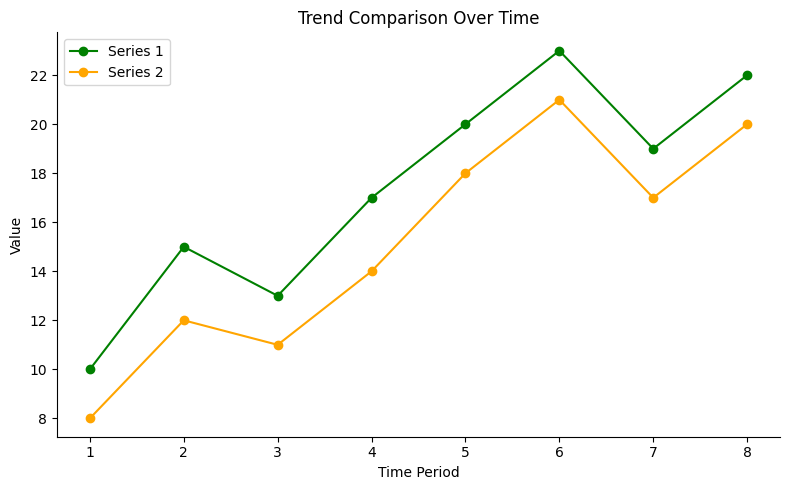

In [21]:
import matplotlib.pyplot as plt

# Sample data: representing two series over 8 time periods
time_periods = [1, 2, 3, 4, 5, 6, 7, 8]
series1 = [10, 15, 13, 17, 20, 23, 19, 22]
series2 = [8, 12, 11, 14, 18, 21, 17, 20]

# Create the line chart
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(time_periods, series1, marker='o', label='Series 1', color='green')
ax.plot(time_periods, series2, marker='o', label='Series 2', color='orange')

# Minimalist design: Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add labels and title for clarity
ax.set_title('Trend Comparison Over Time')
ax.set_xlabel('Time Period')
ax.set_ylabel('Value')
ax.legend()

plt.tight_layout()
plt.show()
